# 1. Entendiendo los datos

## 1.1. Importación de librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Importación de los datos

In [4]:
df = pd.read_csv("DataVentasInmuebles.csv")
df.head(5)

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN


## 1.3 Preguntas Objetivo

### 1. ¿Cuál es el departamento donde se podrían tener más ingresos con la venta de Inmuebles?
### 2. ¿Qué tipo de Inmueble es en promedio el más costoso?
### 3. ¿El precio de un inmueble depende del Estrato?

## 1.4 Información de los datos

In [5]:
df.shape

(463, 12)

El dataset cuenta con 463 registros y 12 columnas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


### Columnas categóricas:
- Código *(Aunque aparezca como Int, es un identificador, además, no es una columna con la que se harán cálculos)*
- Ciudad
- Departamento
- Barrio
- Dirección
- Detalle Disponibilidad
- Estrato
- Tipo de Inmueble
- Datos Adicionales

### Columnas numéricas:
- Área Terreno
- Área Construida
- Precio

## 1.5 Explorando columnas

In [7]:
df['Departamento'].groupby(df['Departamento']).count()

Departamento
ANTIOQUIA           22
ATLÁNTICO           17
BOLÍVAR             18
BOYACÁ               6
CALDAS              21
CAUCA                2
CHOCÓ                2
CUNDINAMARCA        30
CÓRDOBA             10
META               292
PUTUMAYO             1
RISARALDA           15
SANTANDER            4
VALLE DEL CAUCA     23
Name: Departamento, dtype: int64

In [8]:
df['Estrato'].groupby(df.Estrato).count()

Estrato
CINCO          10
COMERCIAL     307
CUATRO         19
DOS            16
INDUSTRIAL     16
RURAL          40
SEIS           15
TRES           19
UNO            21
Name: Estrato, dtype: int64

In [9]:
df.Departamento.groupby(df.Departamento).count()

Departamento
ANTIOQUIA           22
ATLÁNTICO           17
BOLÍVAR             18
BOYACÁ               6
CALDAS              21
CAUCA                2
CHOCÓ                2
CUNDINAMARCA        30
CÓRDOBA             10
META               292
PUTUMAYO             1
RISARALDA           15
SANTANDER            4
VALLE DEL CAUCA     23
Name: Departamento, dtype: int64

In [10]:
df['Tipo de Inmueble'].groupby(df['Tipo de Inmueble']).count()

Tipo de Inmueble
APARTAMENTO                7
BODEGA                    23
CASA                      17
CLINICA                    2
DEPOSITO                   1
EDIFICIO                   4
EDIFICIO OFICINAS          1
FINCA                     10
GARAJE                     2
HOTEL                      1
LOCAL                    305
LOTE                       3
LOTE AGRICOLA              1
LOTE COMERCIAL             1
LOTE CON CONSTRUCCION     15
LOTE INDUSTRIAL            2
LOTE MIXTO                 3
LOTE VIVIENDA             48
OFICINA                   17
Name: Tipo de Inmueble, dtype: int64

In [11]:
print('El número de registros donde la variable "Area Terreno" es igual a cero es de', (df["Area Terreno"]==0).sum())

El número de registros donde la variable "Area Terreno" es igual a cero es de 445


In [12]:
print('El número de registros donde la variable "Area Construida" es igual a cero es de', (df["Area Construida"]==0).sum())

El número de registros donde la variable "Area Construida" es igual a cero es de 453


# 2. Manipular los datos

Formatear el DataFrame para evitar que las columnas numéricas se muestren con notación científica.

In [13]:
pd.options.display.float_format = '{:.4f}'.format

Convertir la columna "Codigo" en tipo categórica.

In [14]:
df['Codigo'] = df['Codigo'].astype('category')

### Columnas que no aportan de acuerdo con las preguntas objetivo:
- Codigo
- Barrio
- Dirección
- Detalle Disponibilidad

## 2.1 Identificar valores vacíos o nulos

In [15]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

## 2.2 Eliminar o reemplazar valores nulos

In [16]:
filas_nulos = df[df["Barrio"].isnull() | df["Datos Adicionales"].isnull()].shape[0]
print('El número de filas con al menos un valor nulo es:', filas_nulos)

El número de filas con al menos un valor nulo es: 440


In [17]:
total_registros = df.shape[0]
total_nulos = df[df["Barrio"].isnull() | df["Datos Adicionales"].isnull()].shape[0]
nulos_barrio = df["Barrio"].isnull().sum()
nulos_datosAd = df["Datos Adicionales"].isnull().sum()
proporcion_nulos = total_nulos/total_registros
print("El procentaje de registros nulos es: {}%.".format(round(proporcion_nulos*100, 2)))
print("El procentaje de registros nulos en la columna 'Barrio' es: {}%.".format(round((nulos_barrio/total_registros)*100, 2)))
print("El procentaje de registros nulos en la columna 'Datos Adicionales' es: {}%.".format(round((nulos_datosAd/total_registros)*100, 2)))

El procentaje de registros nulos es: 95.03%.
El procentaje de registros nulos en la columna 'Barrio' es: 91.36%.
El procentaje de registros nulos en la columna 'Datos Adicionales' es: 74.51%.


**El 95.03% de los registros presentan valores nulos en la columna Barrio o Datos Adicionales, por lo que eliminarlos tendría gran impacto en los datos. Además, teniendo en cuenta que las columnas 'Barrio' y 'Datos Adicionales' tienen un 91.36% y un 74.51% de registros faltantes, respectivamente, por lo que no aportan mucho valor a los datos y que son datos personales que no pueden ser reemplazados por una media o una moda, se decide trabajar sin estas columnas, es decir, eliminarlas.**

In [18]:
df = df.drop(["Barrio", "Datos Adicionales"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Codigo                  463 non-null    category
 1   Ciudad                  463 non-null    object  
 2   Departamento            463 non-null    object  
 3   Direccion               463 non-null    object  
 4   Area Terreno            463 non-null    float64 
 5   Area Construida         463 non-null    float64 
 6   Detalle Disponibilidad  463 non-null    object  
 7   Estrato                 463 non-null    object  
 8   Precio                  463 non-null    float64 
 9   Tipo de Inmueble        463 non-null    object  
dtypes: category(1), float64(3), object(6)
memory usage: 53.3+ KB


## 2.3 Eliminar valores duplicados

In [19]:
df[df.duplicated(keep=False)]

,Codigo,Ciudad,Departamento,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble


**No hay registros duplicados en este dataset.**

## 2.4 Agrupamiento de datos

In [20]:
precio_min = df["Precio"].min()
precio_max = df["Precio"].max()
rangos = np.linspace(precio_min-1, precio_max, 10, int)
nombre_rango = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [21]:
df['Rango Precio'] = pd.cut(df['Precio'], rangos, labels=nombre_rango)
df.head(2)

,Codigo,Ciudad,Departamento,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Rango Precio
0,17180,BOGOTA,CUNDINAMARCA,AV CR 7 NO. 166 - 51 LT B,0.0000,0.0000,COMERCIALIZABLE CON RESTRICCION,TRES,29580811900.0000,LOTE COMERCIAL,F
1,19292,BOGOTA,CUNDINAMARCA,CL 72 No. 12 - 77,0.0000,0.0000,COMERCIALIZABLE,COMERCIAL,16460591500.0000,EDIFICIO,D


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Codigo                  463 non-null    category
 1   Ciudad                  463 non-null    object  
 2   Departamento            463 non-null    object  
 3   Direccion               463 non-null    object  
 4   Area Terreno            463 non-null    float64 
 5   Area Construida         463 non-null    float64 
 6   Detalle Disponibilidad  463 non-null    object  
 7   Estrato                 463 non-null    object  
 8   Precio                  463 non-null    float64 
 9   Tipo de Inmueble        463 non-null    object  
 10  Rango Precio            463 non-null    category
dtypes: category(2), float64(3), object(6)
memory usage: 54.1+ KB


# 3. Métodos para el Análisis de Datos

## 3.1 Medidas de tendencia central y de dispersión

In [23]:
df.describe()

,Area Terreno,Area Construida,Precio
count,463.0000,463.0000,463.0000
mean,15152.0363,87.5173,667203190.3121
std,182710.1037,1137.4691,3272992027.6920
min,0.0000,0.0000,4650000.0000
25%,0.0000,0.0000,12305000.0000
50%,0.0000,0.0000,15870000.0000
75%,0.0000,0.0000,137995500.0000
max,3217197.0000,22724.0000,45233789820.0000


El promedio de Área de los terrenos es de 15152, con una desviación estándar de 182710. El valor mínimo es de 0 y el máximo es de 3217197. Pero, al menos el 75% de los registros tienen un Área Terreno de 0, lo que indica que la información de esta columna no se encuentra en buen estado para hacer un análisis que sirva de base para tomar decisiones.

El promedio de Área construida es de 87, con una desviación estándar de 1137. El valor mínimo es de 0 y el máximo es de 22724. Pero, al menos el 75% de los registros tienen un Área Construida de 0, lo que indica que la información de esta columna no se encuentra en buen estado para hacer un análisis que sirva de base para tomar decisiones.

El promedio del precio de los inmuebles es de 667.203.190,3121, con una desviación estándar de 3.272.992.027,6920. El precio mínimo es de 4.650.000 y el máximo de 45.233.789.820. El 50% de los datos tienen un precio entre 4.650.000 y 15.870.000, mientras que el otro 50% tienen un precio entre 15.870.000 y 45.233.789.820.

## 3.2 Análisis Gráfico

### 3.2.1 Histogramas de Frecuencia

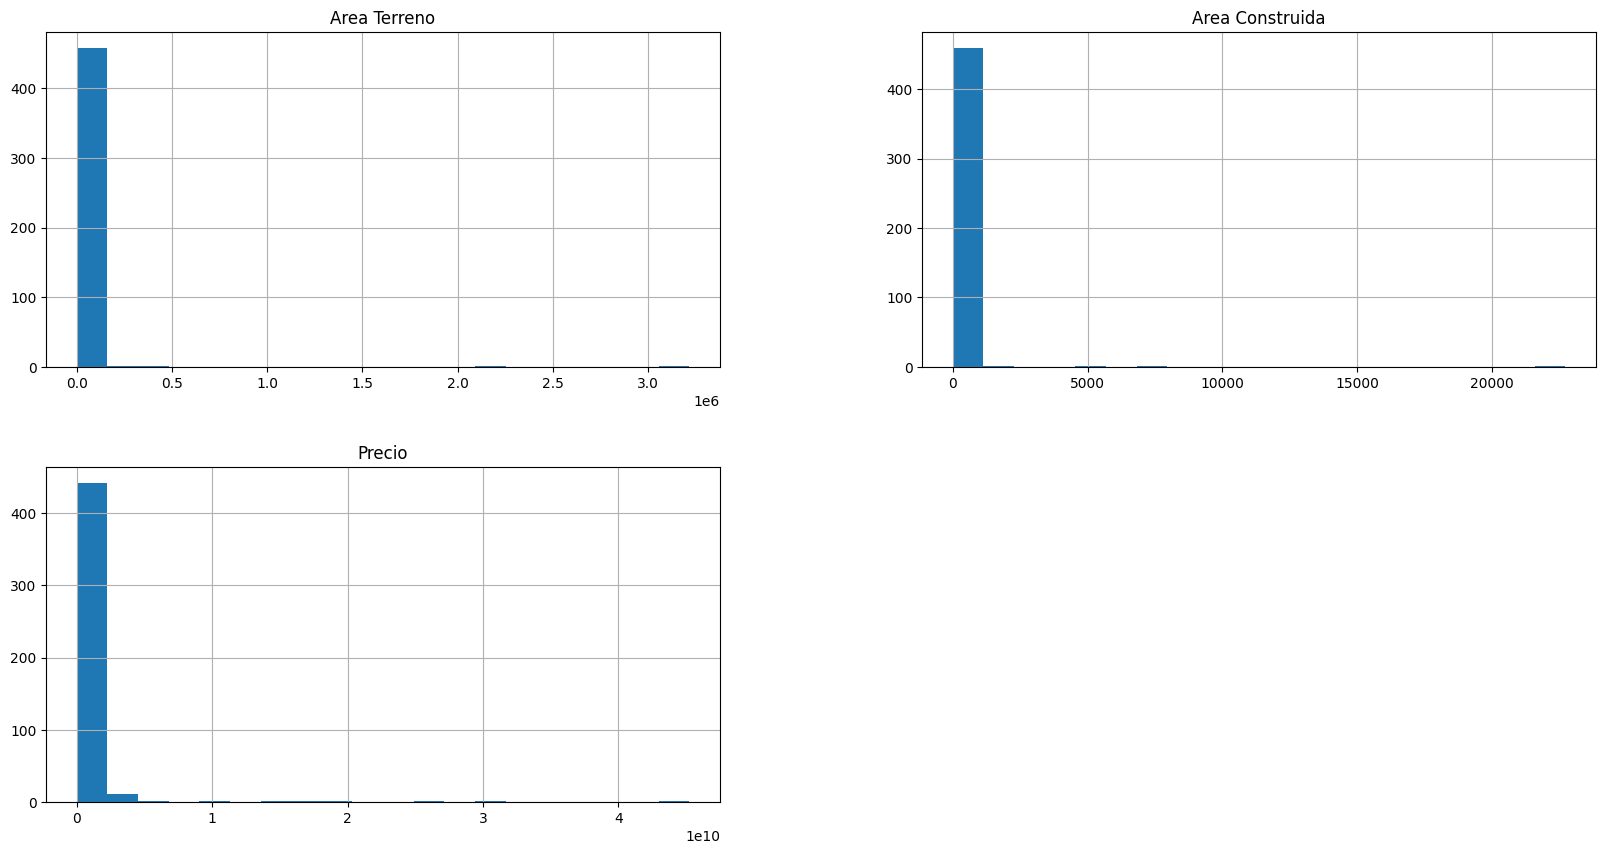

In [24]:
df.hist(bins=20,figsize=(20,10))
plt.show()

Se evidencia que para "Area Terreno" y "Area Construida" hay mucha concentración en el valor de 0.

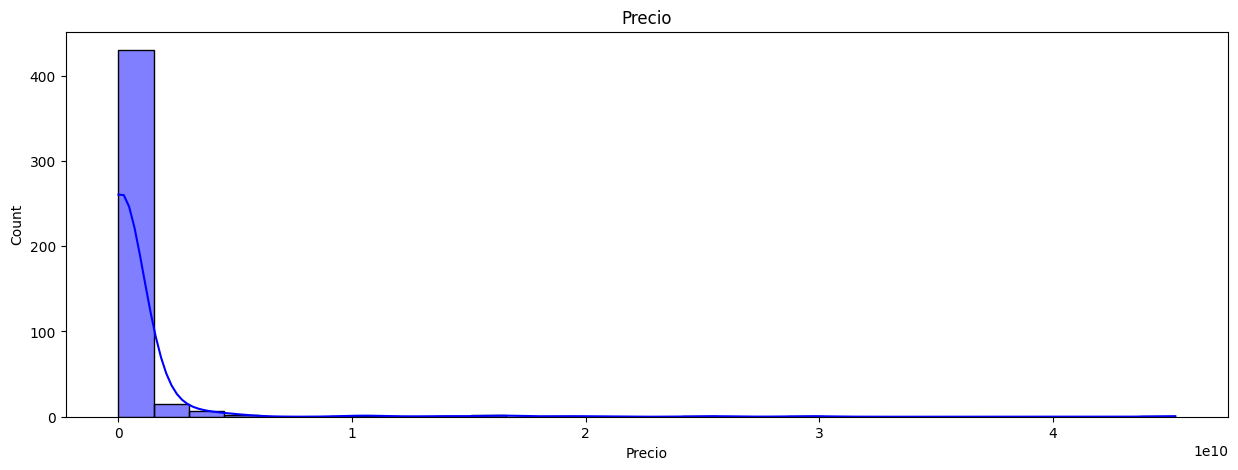

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(df['Precio'], color='b', bins=30, kde=True)
plt.title("Precio")
plt.show()

El Histograma para "Precio" no muestra que es más común tener casas de precios bajos, donde se evidencia mucha concentración de datos.

### 3.2.2 Gráficos de Barras

In [26]:
for i in range(len(nombre_rango)):
    print(nombre_rango[i], " - ", (round(rangos[i],1), round(rangos[i+1], 1)))

A  -  (4649999.0, 5030109979.1)
B  -  (5030109979.1, 10055569959.2)
C  -  (10055569959.2, 15081029939.3)
D  -  (15081029939.3, 20106489919.4)
E  -  (20106489919.4, 25131949899.6)
F  -  (25131949899.6, 30157409879.7)
G  -  (30157409879.7, 35182869859.8)
H  -  (35182869859.8, 40208329839.9)
I  -  (40208329839.9, 45233789820.0)


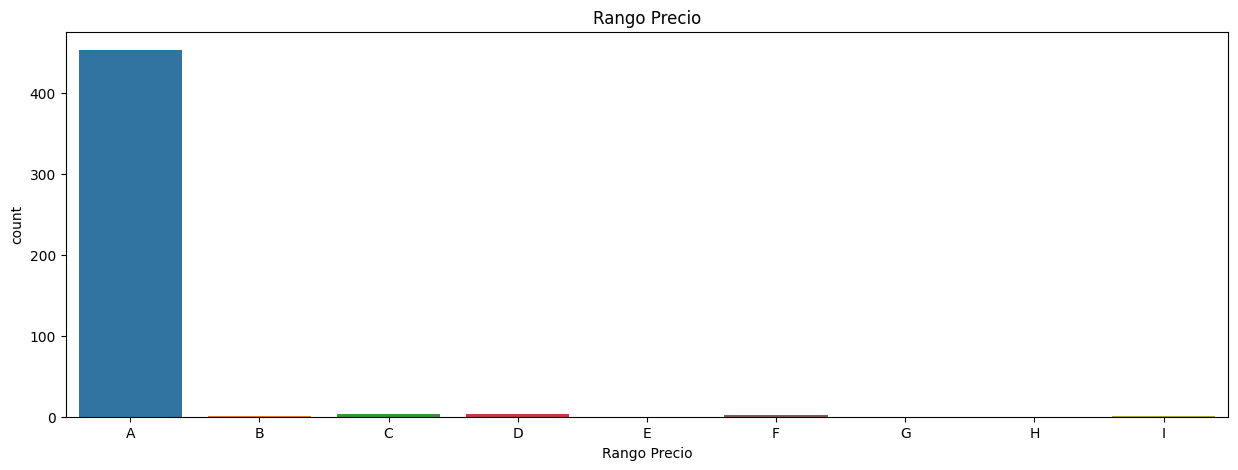

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Rango Precio'])
plt.title('Rango Precio')
plt.show()

Más de 400 inmuebles se encuentran en el rango A de precio, es decir, se encuentran entre 4.649.999,0 y 5.030.109.979,1.

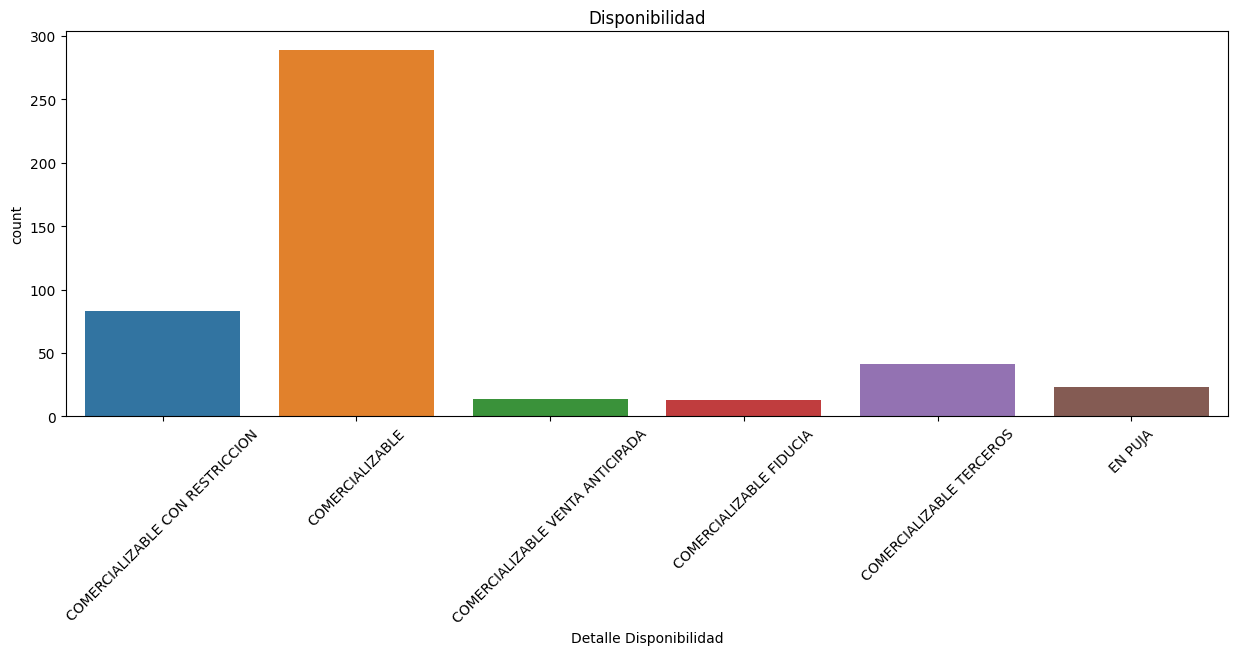

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Detalle Disponibilidad'])
plt.xticks(rotation=45)
plt.title('Disponibilidad')
plt.show()

La mayoría de los datos se encuentran en estado de disponibilidad comercializable.

### 3.2.3 Gráfico de Pastel

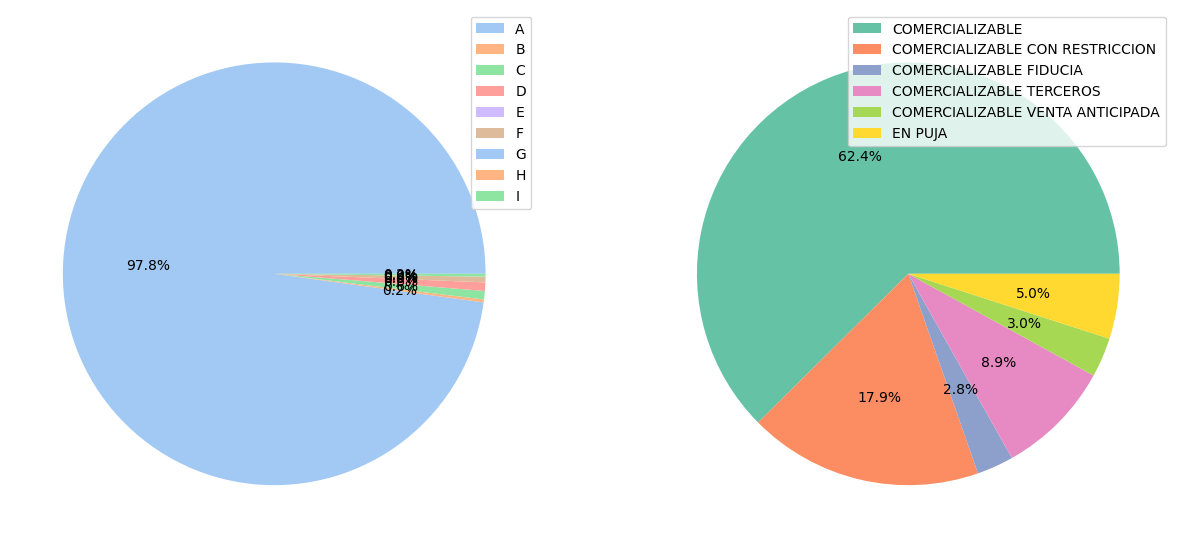

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,15))

total_rprecio = df['Rango Precio'].groupby(df['Rango Precio']).count()
total_ddispon = df['Detalle Disponibilidad'].groupby(df['Detalle Disponibilidad']).count()

labels_rprecio = total_rprecio.index
labels_ddispon = total_ddispon.index

colors_rprecio = sns.color_palette('pastel')[0:6]
colors_ddispon = sns.color_palette('Set2')[0:10]

ax[0].pie(total_rprecio, colors = colors_rprecio, autopct='%.1f%%')
ax[0].legend(labels_rprecio)
ax[1].pie(total_ddispon, colors=colors_ddispon, autopct='%.1f%%')
ax[1].legend(labels_ddispon)
plt.show()

Nuevamente aquí podemos confirmar lo evidenciado en los gráficos de barra, pero esta vez de manera proporcional. El 97.8% de los inmuebles tienen un precio rango A, es decir, entre 4.649.999,0,y 5.030.109.979,1. Por otro lado, el 62.4% de los inmuebles se encuentran en estado de disponibilidad comercializable.

### 3.2.4 Gráfico de Correlación

C:\Users\jalex\AppData\Local\Temp\ipykernel_64696\3736194063.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlación entre variables\n')

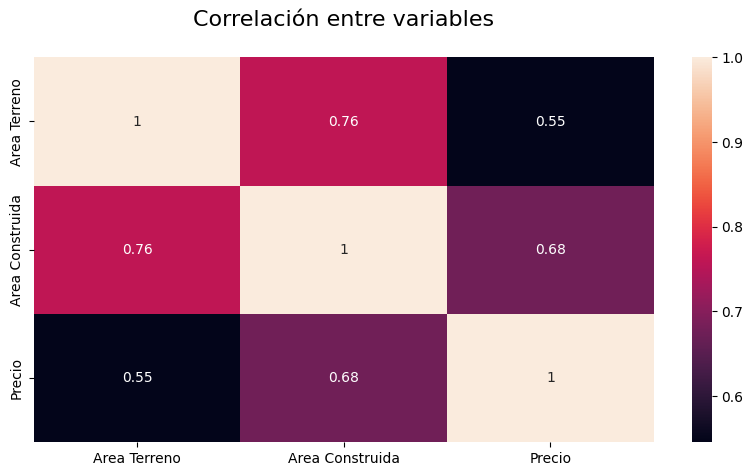

In [30]:
plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title('Correlación entre variables\n', {'fontsize': 16})

Podemos observar que la variable Area Terreno y Precio tienen una relación muy debil, cuando deberían tener una relación fuerte y directa, lo mismo aplica para la relación entre Area Construida y Precio.

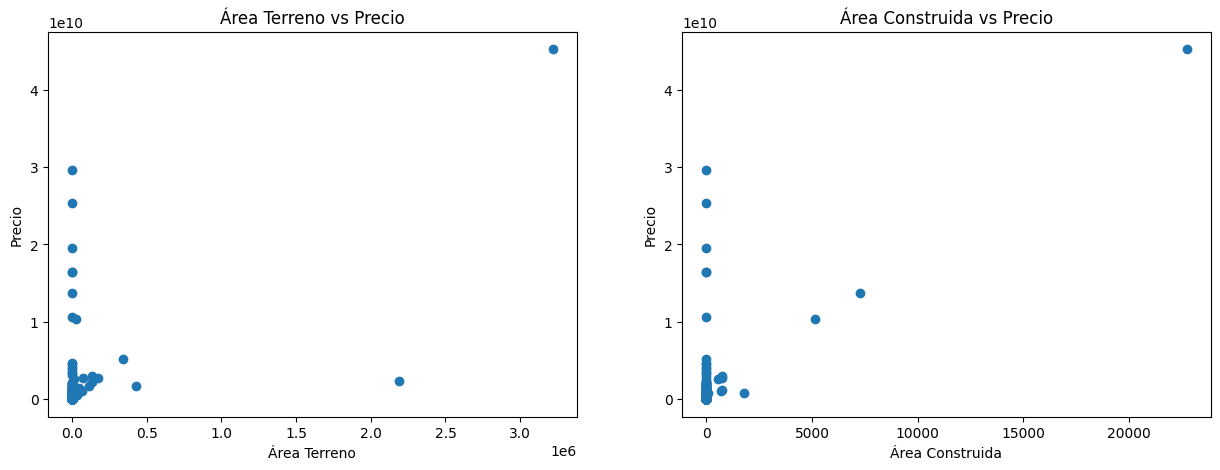

In [31]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].scatter(x=df['Area Terreno'], y=df['Precio'])
axs[0].set(xlabel='Área Terreno', ylabel='Precio', title='Área Terreno vs Precio')
axs[1].scatter(x=df['Area Construida'], y=df['Precio'])
axs[1].set(xlabel='Área Construida', ylabel='Precio', title='Área Construida vs Precio')
plt.show()

En estos gráficos de dispersión tambié podemos observar que no hay correlaciones significativas entre Area Contruida y Area Terreno y Precio. Inclusive, hay acumulación en 0.

### 3.2.5 Gráfico de Caja y Bigote

Text(0.5, 1.0, 'Rango Precio vs Area Terreno\n')

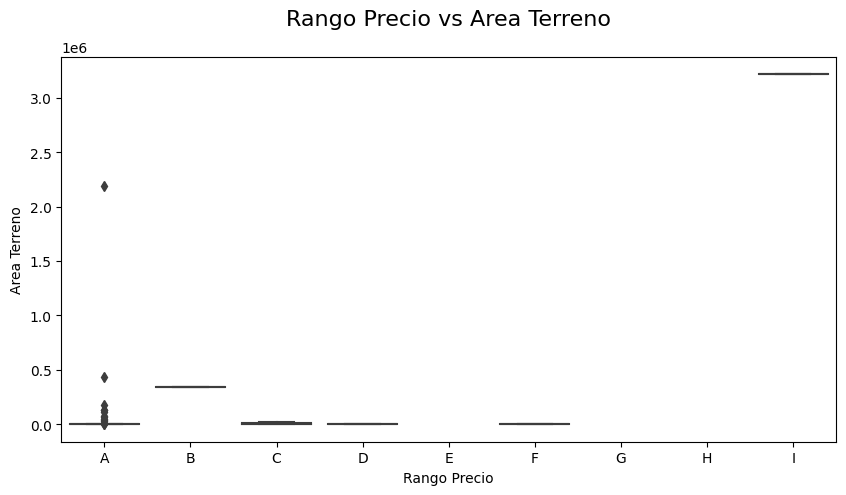

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Rango Precio', y='Area Terreno')
plt.title('Rango Precio vs Area Terreno\n', {'fontsize':16})

Este gráfico nos muestra la existencia de valores atípicos en el rango de precio A frente a Area Terreno. Por otro lado, en el rango precio I, que es el más alto, se evidencia que el Area Terreno también es alta, lo cual sí tiene coherencia.

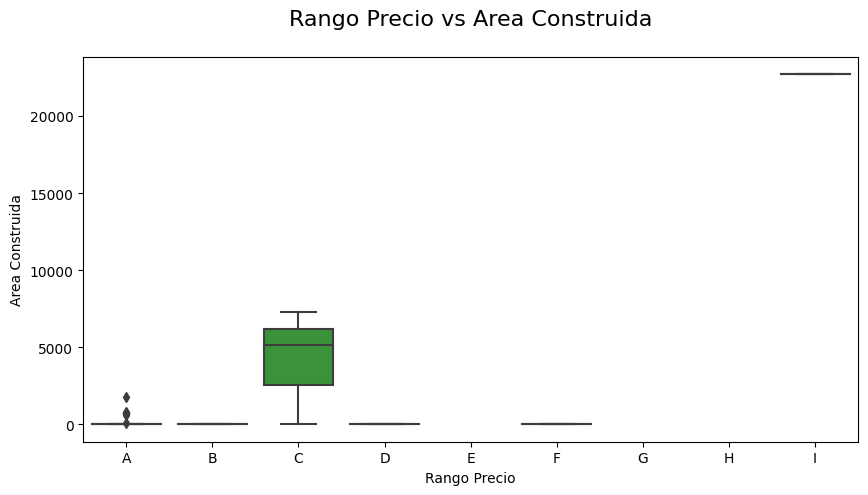

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Rango Precio', y='Area Construida')
plt.title('Rango Precio vs Area Construida\n', {'fontsize':16})
plt.show()

En este gráfico podemos observar la existencia de valores atípicos en el rango de precio A frente a Area Construida. También vemos una acumulación en el rango de precio C con un sesgo hacia la derecha. Por otro lado, de igual forma que en el gráfico anterior a este, en el rango precio I, que es el más alto, se evidencia que el Area Construida también es alta, lo cual también tiene coherencia.

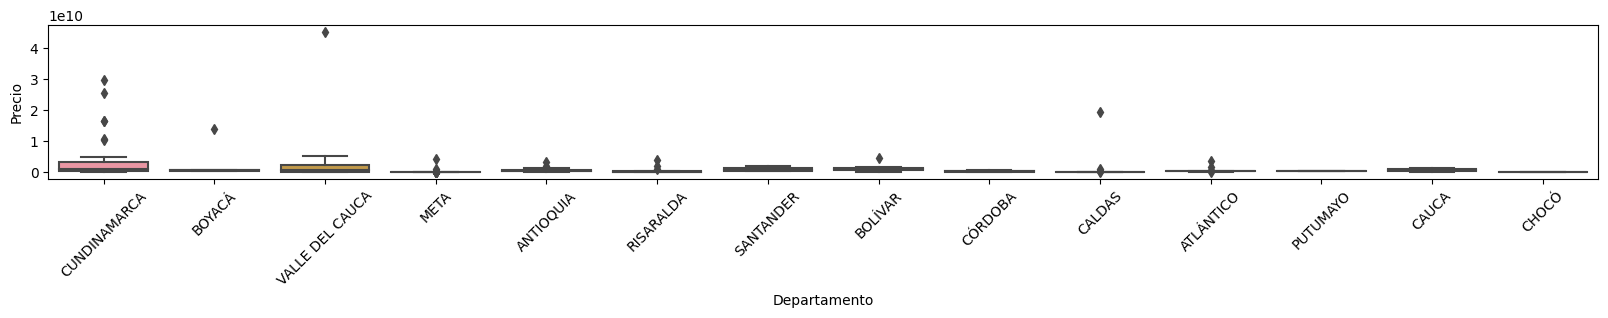

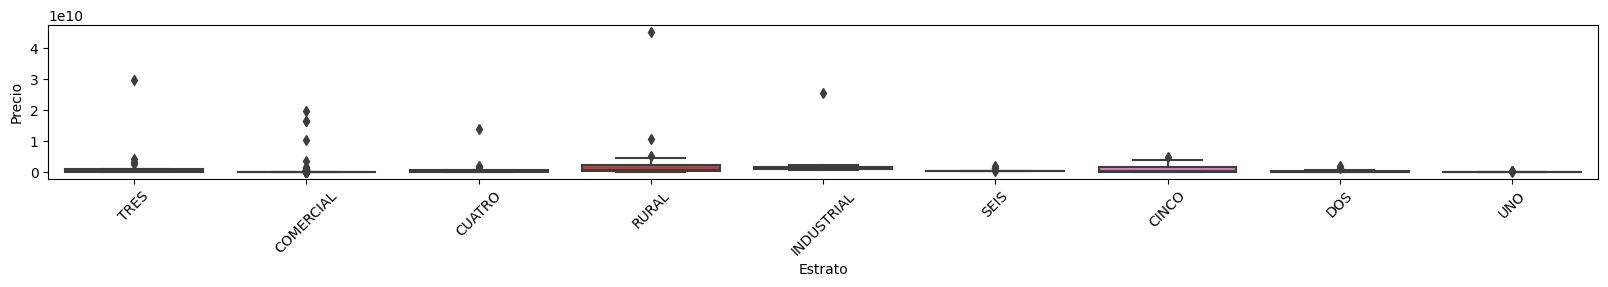

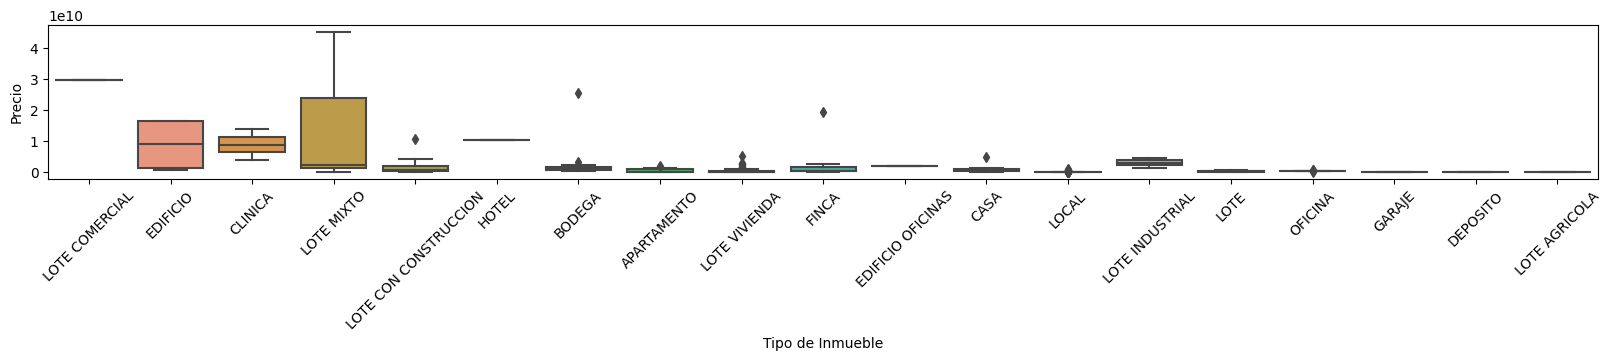

In [34]:
for col in ['Departamento', 'Estrato', 'Tipo de Inmueble']:
    fig, axs = plt.subplots(figsize=(20,2))
    sns.boxplot(data=df, x=col, y='Precio')
    plt.xticks(rotation=45)
    plt.show()

Estos gráficos son algo general para ver cómo se comportan las variables categóricas que aportan valor al estudio frente al precio de los inmuebles.

# RESPUESTA A PREGUNTAS OBJETIVO

### 1. ¿Cuál es el departamento donde se podrían tener más ingresos con la venta de Inmuebles?

In [35]:
precios_acumulados = df['Precio'].groupby(df['Departamento']).sum()
precios_acumulados

Departamento
ANTIOQUIA          13190758576.0000
ATLÁNTICO           8458588540.0000
BOLÍVAR            20038558614.0000
BOYACÁ             15910843800.0000
CALDAS             21101256106.0000
CAUCA               1431561306.0000
CHOCÓ                161096916.6400
CUNDINAMARCA      133887001698.0000
CÓRDOBA             2527962871.0000
META                9319717971.0000
PUTUMAYO             185848000.0000
RISARALDA           8083986918.3300
SANTANDER           3654766419.0000
VALLE DEL CAUCA    70963129378.5300
Name: Precio, dtype: float64

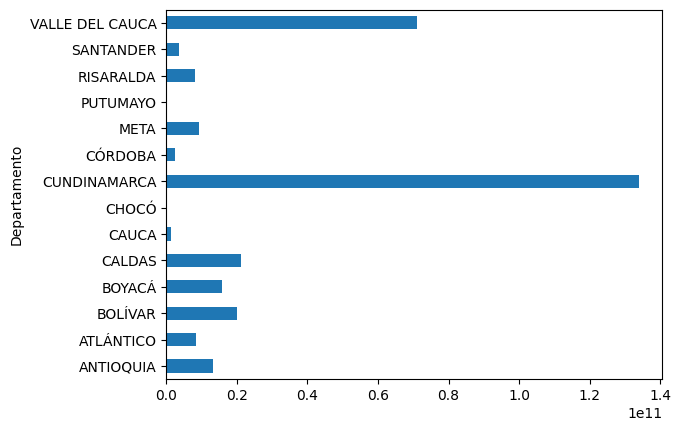

In [36]:
precios_acumulados.plot(kind = 'barh');

**El departamento donde se podrían tener más ingresos con la venta de inmuebles es Cundinamarca con un precio de 133.887.001.698 para todos sus inmuebles.**

### 2. ¿Qué tipo de Inmueble es en promedio el más costoso?

In [37]:
promedio_por_tipo = df['Precio'].groupby(df['Tipo de Inmueble']).mean()
promedio_por_tipo

Tipo de Inmueble
APARTAMENTO               581242739.7143
BODEGA                   2251648064.3478
CASA                      795269540.5882
CLINICA                  8850014075.0000
DEPOSITO                    7152000.0000
EDIFICIO                 8798400162.5000
EDIFICIO OFICINAS        1935725000.0000
FINCA                    2561624617.7000
GARAJE                     29083560.0000
HOTEL                   10407336173.0000
LOCAL                      28677130.2492
LOTE                      250428120.0000
LOTE AGRICOLA               4650000.0000
LOTE COMERCIAL          29580811900.0000
LOTE CON CONSTRUCCION    1700665326.0667
LOTE INDUSTRIAL          2971843450.0000
LOTE MIXTO              15889949163.8400
LOTE VIVIENDA             547060965.3744
OFICINA                   244407258.2353
Name: Precio, dtype: float64

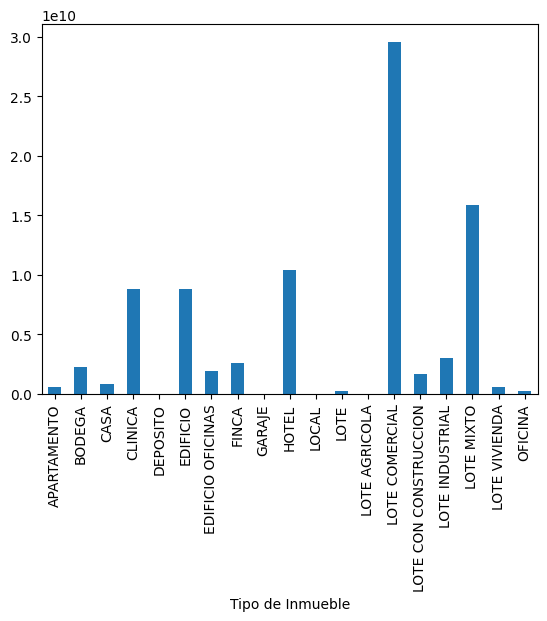

In [38]:
promedio_por_tipo.plot(kind = 'bar');

**Los lotes comerciales son, en promedio, los inmuebles más costosos.**

### 3. ¿El precio de un inmueble depende del Estrato? ¿Tienen alguna relación?

In [39]:
promedio_por_estrato = df['Precio'].groupby(df['Estrato']).mean()
promedio_por_estrato

Estrato
CINCO        1278926980.0000
COMERCIAL     255572675.0770
CUATRO       1082890305.3337
DOS           336402400.0000
INDUSTRIAL   2646415343.1250
RURAL        2450882122.4380
SEIS          401450223.2000
TRES         2335572574.6842
UNO            44384724.2857
Name: Precio, dtype: float64

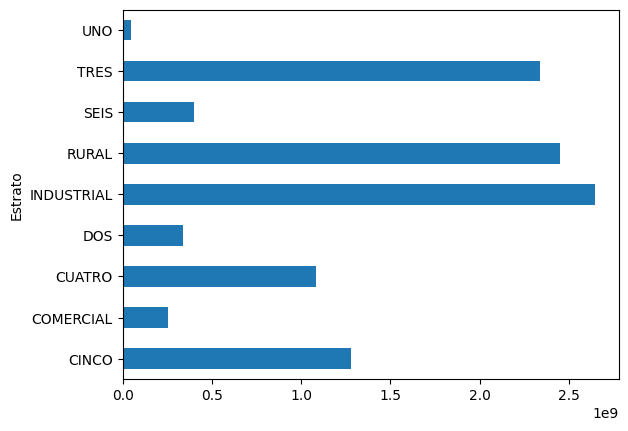

In [40]:
promedio_por_estrato.plot(kind = 'barh');

**En este dataset no se evidencia ninguna relación entre el Estrato del inmueble y su Precio.**